<a href="https://colab.research.google.com/github/shadiakiki1986/sklearn-digits-jitter/blob/master/sklearn_digits_with_jitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The digits dataset from sklearn, with jitter

- [sklearn load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

Published at https://github.com/shadiakiki1986/sklearn-digits-jitter/

# get data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

# pad all the images such that translation doesn't lose info

In [9]:
#type(digits.images) # np.ndarray
#type(digits.data) # np.ndarray
#digits.images.shape # (1797, 8, 8)
#digits.data.shape # (1797, 64)

(1797, 64)

In [44]:
pad_width = 3

In [13]:
import numpy as np

In [43]:
# tests
#print(digits.images[-1])
#print(np.pad(digits.images[0], (1,0), 'constant', constant_values=0)) # add to top and left
#print(np.pad(digits.images[0], (0,1), 'constant', constant_values=0)) # add to bottom and right
#digits.images.shape, np.pad(digits.images, (0,1), 'constant', constant_values=0).shape
#print(np.pad(digits.images, (0,1), 'constant', constant_values=0)[:-1][-1]) # add to bottom and right

[[ 0.  0. 10. 14.  8.  1.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.]]
[[ 0.  0. 10. 14.  8.  1.  0.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [47]:
digpad = {}

# First, pad to an odd number of digits
# (0,1) to add 1 pixel to bottom and right of each array
# [:-1] to drop the extra last all-zeros entry
digpad["images"] = np.pad(digits.images, (0,1), 'constant', constant_values=0)[:-1]

# next, pad to the desired pad_width
digpad["images"] = np.pad(digpad["images"], pad_width, 'constant', constant_values=0)[pad_width:-pad_width]

digits.images.shape, digpad["images"].shape, digits.images[0].shape, digpad["images"][0].shape

((1797, 8, 8), (1797, 15, 15), (8, 8), (15, 15))

In [77]:
# utility plotting code
# From https://www.codespeedy.com/image-augmentation-using-skimage-in-python/
#basic Function to display image side by side
from matplotlib import pyplot as plt
def plot_side(img1, img2, title1, title2, cmap = None):
    fig = plt.figure(tight_layout='auto', figsize=(5,5))
    fig.add_subplot(221)
    plt.title(title1)
    plt.imshow(img1, origin="lower")
    plt.colorbar()

    fig.add_subplot(222)
    plt.title(title2)
    plt.imshow(img2, cmap = None, origin="lower")
    plt.colorbar()
    
    return fig

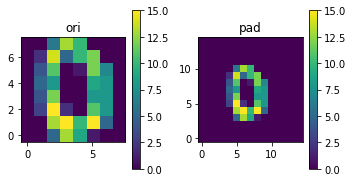

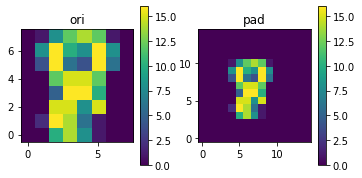

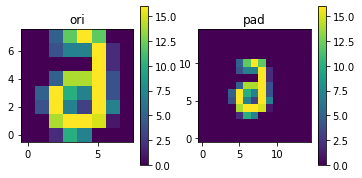

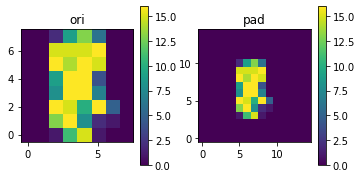

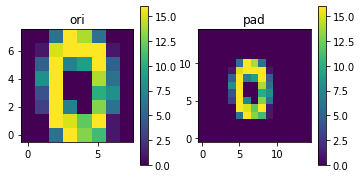

In [78]:
for i in range(5):
  i = -1*i
  plot_side(digits.images[i], digpad["images"][i], "ori", "pad")
  plt.show()

# generate jitter and check that it's balanced

## (deprecated) method 1: rng.integers: not jointly uniform though

```
jitter_max = 3
```

```
# +1 to be inclusive of the high side
rng = np.random.default_rng()
size = len(digpad["images"])
#size*=100 # FIXME increasing sample size to see if issue of not being jointly uniform is fixed
jitter_xy = rng.integers(low=-1*jitter_max, high=+1*jitter_max+1, size=(size,2))
jitter_xy.shape
```

```
plt.hist(jitter_xy[:,0], bins=np.arange(jitter_xy.min(), jitter_xy.max()+1, 1)-.5)
plt.title("jitter_x")
plt.show()

plt.hist(jitter_xy[:,1], bins=np.arange(jitter_xy.min(), jitter_xy.max()+1, 1)-.5)
plt.title("jitter_y")
plt.show()
```

```
import pandas as pd
count_jitter = pd.DataFrame(jitter_xy, columns=["x","y"]).value_counts().unstack()
print(f"min: {count_jitter.min().min()}")
count_jitter - count_jitter.min().min()
```

For (x,y) = (-3,-3), it is sampled 74 times, a third as much as (1,3) which is sampled 212 times => not balanced

```
del jitter_xy
```

## method 2: is jointly uniform

In [53]:
jitter_max = 3
assert jitter_max <= pad_width

In [54]:
# util func
# overall distribution of jitter x/y pairs
import pandas as pd
def print_hist(jitter_xy):
  print(pd.DataFrame(jitter_xy, columns=["x","y"]).value_counts().unstack())

In [55]:
# numpy random number generator
rng = np.random.default_rng()

For the end jittering to be balanced overall AND per digit, get the locations of each digit

In [56]:
loc_t = []
for t in range(10):
  loc_t += np.where(digits.target == t)[0].tolist()

len(loc_t)

1797

In [57]:
loc_t[:3], digits.target[[0,10,20]]

([0, 10, 20], array([0, 0, 0]))

In [58]:
loc_t[200:203], digits.target[[218, 221, 227]]

([218, 221, 227], array([1, 1, 1]))

Start calculating jitter

In [59]:
# cartesian product of possible jitter pairs
# https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays

# Option 1: range -jitter:1:+jitter
jitter_xy = np.array(np.meshgrid(
    range(-1*jitter_max, +1*jitter_max + 1, 1),
    range(-1*jitter_max, +1*jitter_max + 1, 1)
)).T.reshape((-1,2))
assert jitter_xy.shape == (49, 2)


# Option 2: Just -jitter, 0, +jitter
#jitter_xy = np.array(np.meshgrid(
#    [-1*jitter_max, 0, +1*jitter_max],
#    [-1*jitter_max, 0, +1*jitter_max]
#)).T.reshape((-1,2))
#assert jitter_xy.shape == (9, 2)

print(jitter_xy.T)

[[-3 -3 -3 -3 -3 -3 -3 -2 -2 -2 -2 -2 -2 -2 -1 -1 -1 -1 -1 -1 -1  0  0  0
   0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3  3  3  3
   3]
 [-3 -2 -1  0  1  2  3 -3 -2 -1  0  1  2  3 -3 -2 -1  0  1  2  3 -3 -2 -1
   0  1  2  3 -3 -2 -1  0  1  2  3 -3 -2 -1  0  1  2  3 -3 -2 -1  0  1  2
   3]]


In [60]:
print_hist(jitter_xy)

y   -3  -2  -1   0   1   2   3
x                             
-3   1   1   1   1   1   1   1
-2   1   1   1   1   1   1   1
-1   1   1   1   1   1   1   1
 0   1   1   1   1   1   1   1
 1   1   1   1   1   1   1   1
 2   1   1   1   1   1   1   1
 3   1   1   1   1   1   1   1


In [61]:
# Repeat the jitters to get one jitter per entry in the dataset
import math
ndig = 10 # There are 10 digits in the dataset
jrep = math.ceil(len(digits.images)/ndig/jitter_xy.shape[0])
assert jrep == 4 # for range option above
#assert jrep == 20 # for edges only
# Update: use np.repeat to get -3 -3 -3 -2 -2 -2 ... then np.tile to get -3 -3 -3 -2 -2 -2 ... -3 -3 -3 -2 -2 -2 ...
jitter_xy = np.repeat(jitter_xy, jrep, axis=0)
jitter_xy = np.tile(jitter_xy.T, ndig).T
assert jitter_xy.shape == (1960, 2) # for range option
#assert jitter_xy.shape == (1800, 2) # for edges option

In [62]:
print_hist(jitter_xy)

y   -3  -2  -1   0   1   2   3
x                             
-3  40  40  40  40  40  40  40
-2  40  40  40  40  40  40  40
-1  40  40  40  40  40  40  40
 0  40  40  40  40  40  40  40
 1  40  40  40  40  40  40  40
 2  40  40  40  40  40  40  40
 3  40  40  40  40  40  40  40


In [63]:
# for range option
jitter_xy[:5, :], jitter_xy[4*49-2:4*49+5, :] # , jitter_xy[100:103, :]

(array([[-3, -3],
        [-3, -3],
        [-3, -3],
        [-3, -3],
        [-3, -2]]), array([[ 3,  3],
        [ 3,  3],
        [-3, -3],
        [-3, -3],
        [-3, -3],
        [-3, -3],
        [-3, -2]]))

In [64]:
# randomly drop n jitters where n is the extra number of jitters we have from the repetition
jitter_drop = jitter_xy.shape[0] - len(digits.images)
assert jitter_drop == 1960 - 1797 # for range option
#assert jitter_drop == 1800 - 1797 # for edges option

# Note: high is excluded
# Update: instead of random integers, which could give the same integer more than once, get random without repetition
#jitter_drop = rng.integers(low=0, high=jitter_xy.shape[0], size=jitter_drop).tolist()
drop_ind = np.arange(jitter_xy.shape[0])
rng.shuffle(drop_ind)
jitter_drop = drop_ind[:jitter_drop]
assert jitter_drop.shape[0] == len(set(jitter_drop.tolist())) # no dupes

jitter_xy = np.delete(jitter_xy, jitter_drop, axis=0)
assert jitter_xy.shape == (1797, 2)

In [65]:
print_hist(jitter_xy)

y   -3  -2  -1   0   1   2   3
x                             
-3  35  37  37  38  38  36  39
-2  36  37  35  37  35  37  35
-1  35  38  36  37  36  35  36
 0  36  38  37  35  38  39  36
 1  37  37  34  38  35  37  40
 2  36  40  36  37  36  35  37
 3  39  37  38  37  38  32  37


In [66]:
# Update: shuffling will make a balanced set overall, but not per digit
#rng = np.random.default_rng()
#rng.shuffle(jitter_xy)

# distribute the jitters by digit
jitter_2 = np.zeros_like(jitter_xy)
for i, loc_i in enumerate(loc_t):
  jitter_2[loc_i, :] = jitter_xy[i, :]

assert jitter_2.shape == (1797, 2)

In [67]:
print_hist(jitter_2)

y   -3  -2  -1   0   1   2   3
x                             
-3  35  37  37  38  38  36  39
-2  36  37  35  37  35  37  35
-1  35  38  36  37  36  35  36
 0  36  38  37  35  38  39  36
 1  37  37  34  38  35  37  40
 2  36  40  36  37  36  35  37
 3  39  37  38  37  38  32  37


In [68]:
jitter_2[:10,:]

array([[-3, -3],
       [ 3,  3],
       [-3, -3],
       [ 3,  3],
       [-3, -3],
       [ 3,  3],
       [-3, -3],
       [-3,  0],
       [-3, -3],
       [ 3,  2]])

In [69]:
loc_t[175:185]
# transition from indeces of 0 to those of 1
# [1746, 1768, 1793, 1, 11, 21, 42, 47, 56, 70]

[1746, 1768, 1793, 1, 11, 21, 42, 47, 56, 70]

In [70]:
jitter_2[loc_t[:3],:], jitter_2[loc_t[(37-1):39],:], jitter_2[loc_t[(37*2-1):(37*2+2)],:], jitter_2[loc_t[175:185],:]

(array([[-3, -3],
        [-3, -3],
        [-3, -3]]), array([[-2, -1],
        [-2, -1],
        [-2,  0]]), array([[-1,  2],
        [-1,  2],
        [-1,  3]]), array([[ 3,  2],
        [ 3,  2],
        [ 3,  2],
        [ 3,  3],
        [ 3,  3],
        [ 3,  3],
        [ 3,  3],
        [-3, -3],
        [-3, -3],
        [-3, -3]]))

In [71]:
jitter_xy = jitter_2
del jitter_2

In [72]:
print_hist(jitter_xy)

y   -3  -2  -1   0   1   2   3
x                             
-3  35  37  37  38  38  36  39
-2  36  37  35  37  35  37  35
-1  35  38  36  37  36  35  36
 0  36  38  37  35  38  39  36
 1  37  37  34  38  35  37  40
 2  36  40  36  37  36  35  37
 3  39  37  38  37  38  32  37


Much better joint uniform distribution.

Now check that the jitter per digit is also balanced

In [73]:
# count each digit
#digits.target[:3]
pd.Series(digits.target).value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

In [74]:
for t in range(10):
  print("")
  print(f"digit = {t}")
  print(pd.DataFrame(jitter_xy[digits.target==t, :], columns=["x","y"]).value_counts().unstack().fillna(0).astype(int))


digit = 0
y   -3  -2  -1   0   1   2   3
x                             
-3   3   4   3   4   4   4   4
-2   4   4   4   4   3   4   4
-1   3   4   4   3   4   4   3
 0   4   3   4   4   3   4   4
 1   4   4   3   3   4   3   4
 2   3   4   4   4   4   4   4
 3   4   4   4   3   3   4   0

digit = 1
y   -3  -2  -1   0   1   2   3
x                             
-3   4   2   4   4   4   3   4
-2   4   4   4   4   4   3   3
-1   4   4   1   3   4   4   4
 0   4   3   4   2   4   4   4
 1   4   4   3   4   3   4   4
 2   4   4   4   4   3   3   4
 3   4   4   4   4   4   2   8

digit = 2
y   -3  -2  -1   0   1   2   3
x                             
-3   2   4   4   4   4   3   4
-2   4   4   4   4   4   4   4
-1   4   3   4   4   3   4   4
 0   3   4   4   4   4   3   4
 1   3   4   2   4   2   4   4
 2   4   4   4   4   3   4   3
 3   4   4   4   4   4   3   0

digit = 3
y   -3  -2  -1   0   1   2   3
x                             
-3   5   4   4   4   3   4   4
-2   2   3   4   4   3   3

Finally.

# apply jitter

In [75]:
# test
#for img, (jx, jy) in zip(digpad["images"], jitter_xy):
#  print(img.shape, jx, jy)
#  break

(15, 15) -3 -3


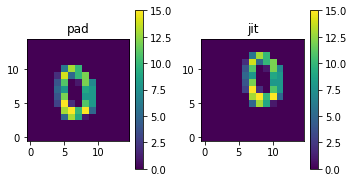

In [79]:
# use sklearn transform
# https://scikit-image.org/docs/dev/api/skimage.transform.html
from skimage.transform import warp
from skimage.transform import SimilarityTransform

my_translate = lambda img, jx, jy: warp(img, SimilarityTransform(translation=(jx, jy)))

# test
plot_side(digpad["images"][0], my_translate(digpad["images"][0], -2, -2), "pad", "jit")
plt.show()

In [82]:
digjit = {}
digjit["images"] = np.zeros_like(digpad["images"])
for i, (img, (jx, jy)) in enumerate(zip(digpad["images"], jitter_xy)):
  digjit["images"][i] = my_translate(img, jx, jy)

digjit["images"].shape

((1797, 15, 15), (15, 15))

array([   0.,  449.,  898., 1348., 1797.])

label = 0, jitter = [-3 -3]


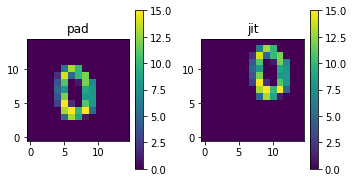

label = 3, jitter = [-2  2]


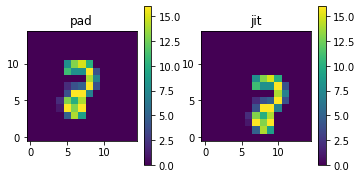

label = 8, jitter = [ 0 -1]


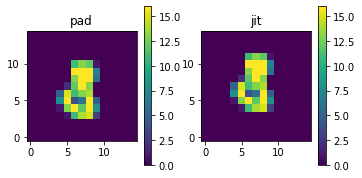

label = 3, jitter = [ 2 -1]


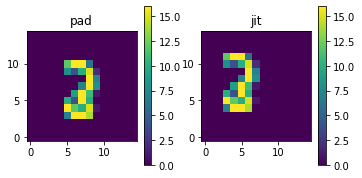

label = 8, jitter = [3 2]


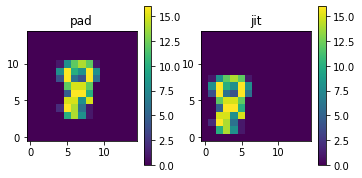

In [96]:
for i in np.linspace(0, digjit["images"].shape[0]-1, 5).astype(int):
  print(f"label = {digits.target[i]}, jitter = {jitter_xy[i]}")
  plot_side(digpad["images"][i], digjit["images"][i], "pad", "jit")
  plt.show()

In [101]:
digits.images.shape

(1797, 8, 8)

In [109]:
def im2data(digxxx_img):
  #return np.vstack([img.reshape((-1,1)).squeeze() for img in digxxx_img])
  return digxxx_img.reshape((-1, digxxx_img.shape[1]*digxxx_img.shape[2], 1)).squeeze()
  
digjit["data"] = im2data(digjit["images"])
assert digjit["data"].shape == (1797, 225)

digpad["data"] = im2data(digpad["images"])
assert digpad["data"].shape == (1797, 225)

In [112]:
# util to save to csv
def my_savetxt(a, fn_csv):
  print("")
  !rm -rf "$fn_csv" "{fn_csv}.gz"
  np.savetxt(fn_csv, a.astype(int), delimiter=",", fmt="%i")

  !du -sh "$fn_csv"
  !wc -l "$fn_csv"
  !head -n3 "$fn_csv"
  !echo "..."
  !tail -n3 "$fn_csv"

  !gzip "$fn_csv"
  !du -sh "{fn_csv}.gz"

In [113]:
# save to csv, like the sklearn format at https://github.com/scikit-learn/scikit-learn/tree/main/sklearn/datasets/data
my_savetxt(digjit["data"], "digits_jitter.csv")

# Also save the padded version (without the jitter)
my_savetxt(digpad["data"], "digits_padded.csv")

# and the jitter values
my_savetxt(jitter_xy, "jitter_xy.csv")


824K	digits_jitter.csv
1797 digits_jitter.csv
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,13,9,1,0,0,0,0,0,0,0,0,0,0,0,13,15,10,15,5,0,0,0,0,0,0,0,0,0,3,15,2,0,11,8,0,0,0,0,0,0,0,0,0,4,12,0,0,8,8,0,0,0,0,0,0,0,0,0,5,8,0,0,9,8,0,0,0,0,0,0,0,0,0,4,11,0,1,12,7,0,0,0,0,0,0,0,0,0,2,14,5,10,12,0,0,0,0,0,0,0,0,0,0,0,6,13,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,12,13,5,0,0,0,0,0,0,0,0,0,0,0,0,11,16,9,0,0,0,0,0,0,0,0,0,0,0,3,15,16,6,0,0,0,0,0,0,0,0,0,0,7,15,16,16,2,0,0,0,0,0,0,0,0,0,0,0,1,16,16,3,0,0,0,0,0,0,0,0,0,0,0,1,16,16,6,0,0,0,0,0,0,0,0,0,0,0,1,16,16,6,0,0,0,0,0,0,0,0,0,0,0,0,11,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,